As their Chief Data Analyst, you've been given access to the complete data from their most recent animal study. In this study, 250 mice were treated through a variety of drug regimes over the course of 45 days. Their physiological responses were then monitored over the course of that time. Your objective is to analyze the data to show how four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.

To do this you are tasked with:

- [ ] Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
- [ ] Creating a scatter plot that shows how the number of [metastatic](https://en.wikipedia.org/wiki/Metastasis) (cancer spreading) sites changes over time for each treatment.
- [ ] Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)
- [ ] Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.
- [ ] Include 3 observations about the results of the study. Use the visualizations you generated from the study data as the basis for your observations.

As final considerations:

* You must use the Pandas Library and the Jupyter Notebook.
* You must use the Matplotlib library.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, X and Y Axis Limits, etc.
* Your scatter plots must include [error bars](https://en.wikipedia.org/wiki/Error_bar). This will allow the company to account for variability between mice. You may want to look into [`pandas.DataFrame.sem`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sem.html) for ideas on how to calculate this.
* Remember when making your plots to consider aesthetics!
  * Your legends should not be overlaid on top of any data.
  * Your bar graph should indicate tumor growth as red and tumor reduction as green.
    It should also include a label with the percentage change for each bar.

In [493]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

In [494]:
# Read the Mouse and Drug Data
mouseDrug_df = pd.read_csv(mouse_drug_data_to_load)
#mouseDrug_df.head()
mouseDrug_df
#mouseDrug_df.columns

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn
...,...,...
245,i669,Placebo
246,r850,Placebo
247,a262,Placebo
248,q787,Placebo


In [495]:
# Read the the Clinical Trial Data
clincalTrial_df = pd.read_csv(clinical_trial_data_to_load)
#clincalTrial_df.head()

clincalTrial_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [496]:
# Combine the data into a single dataset
combined_df = pd.merge(clincalTrial_df, mouseDrug_df, on='Mouse ID', how='left')

# Display the data table for preview
combined_df.head()

# print(combined_df['Mouse ID'].value_counts())
# print(combined_df['Timepoint'].value_counts())
# print(combined_df['Tumor Volume (mm3)'].value_counts())
# print(combined_df['Metastatic Sites'].value_counts())
# print(combined_df['Drug'].value_counts())



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [497]:
# Display the data table for preview

## Tumor Response to Treatment

In [498]:
#groupByDrugTimepoint = combined_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)']
#means_df = groupByDrugTimepoint.mean()
#means_df = means_df.reset_index()
#means_df
#means_df["Timepoint"].unique()


In [499]:
# pd.options.display.max_rows = 30

In [500]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
groupByDrugTimepoint = combined_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)']
means_df = groupByDrugTimepoint.mean()

# Convert to DataFrame
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html
# https://stackoverflow.com/questions/20110170/turn-pandas-multi-index-into-column
means_df = means_df.reset_index()

# Preview DataFrame
means_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [501]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
stdError_df = groupByDrugTimepoint.sem()

# Convert to DataFrame
stdError_df = stdError_df.reset_index()

# Preview DataFrame
stdError_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [502]:
# Minor Data Munging to Re-Format the Data Frames

# use pivot to make Drug columns and Timepoint index for rows, 
# values are mean of Tumor Volume
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html 

meansPivot_df = pd.pivot_table(means_df, index="Timepoint", columns="Drug")

# Preview that Reformatting worked
meansPivot_df = meansPivot_df['Tumor Volume (mm3)']
meansPivot_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [503]:
#https://stackoverflow.com/questions/27576795/flatten-dataframe-with-multi-index-columns
    #pd.melt(meansPivot_df.reset_index(), id_vars=['Timepoint'], value_name='stock')
#pd.melt(meansPivot_df.reset_index(), id_vars=['Timepoint'], value_name='Tumor Vol')

In [504]:
#https://stackoverflow.com/questions/27576795/flatten-dataframe-with-multi-index-columns
# means_unstack = meansPivot_df.unstack().reset_index().drop('level_0', axis=1)
# means_unstack

# means_unstack = meansPivot_df.unstack()
# means_unstack

# means_unstack = meansPivot_df.unstack().reset_index().drop('level_0', axis=1)
# means_unstack

In [505]:
# Minor Data Munging to Re-Format the Data Frames
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html 

# use pivot to make Drug columns and Timepoint index for rows, 
# values are std error of Tumor Volume
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html
stdErrorPivot_df = pd.pivot_table(stdError_df, index="Timepoint", columns="Drug")

# Preview that Reformatting worked
stdErrorPivot_df = stdErrorPivot_df['Tumor Volume (mm3)']
stdErrorPivot_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [506]:
# DELETE THESE TRIALS
#df = meansPivot_df['Tumor Volume (mm3)']
#df.loc[df.index == 5]
#ndf.reset_index(inplace=True)
#ndf.plot(kind='scatter', x='Timepoint', y='Capomulin', title='Timepoint vs Tumor Volume (mm3) by Drug')
#ndf.plot(kind='scatter', x='Timepoint', y='Ceftamin')


#means_df[['Timepoint']]
#df = meansPivot_df[['Tumor Volume (mm3)']].reset_index()
#ndf= pd.DataFrame(df['Tumor Volume (mm3)']['Capomulin'])
#ndf
#pd.Series(ndf['Capomulin'])
#ndf['Capomulin']
#ndf
#n2 = ndf[['Capomulin']]
#n2
#ndf.reset_index
#ndf.plot(kind='scatter', x='Timepoint', y='Capomulin')

#meansPivot_df['Capomulin']

In [507]:
# DELETE THESE TRIALS
# df = meansPivot_df['Tumor Volume (mm3)']
# colnames = list(df.columns)
# colnames
# colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 
#           'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 
#           'tab:olive', 'tab:cyan']

# [print(f"Column: {column}, color" {color})]
# df.plot()


In [508]:
# DELETE THESE TRIALS 
#df = meansPivot_df
#colnames = list(df.columns)
#df['Capomulin']
#df['Timepoint']
#df['Tumor Volume (mm3)']
#df[['Timepoint']]

#print(df[['Timepoint']])
#print("\n")
#df[['Tumor Volume (mm3)']]
#print(df[['Tumor Volume (mm3)']])
#print("\n")

#list(df.columns)
#df["Capomulin"]


### Homework Notes
* Readme asks for scatterplots here
* Sample images and starter jupyter notebook show line plots
* Cannot get scatter plots to plot multiple columns of data onto same graph
* Using Linegraphs with no lines to plot Tumor Volume over Time points for each drug to approximate a scatter plot
* Subsequently using linegraphs for rest of the plots


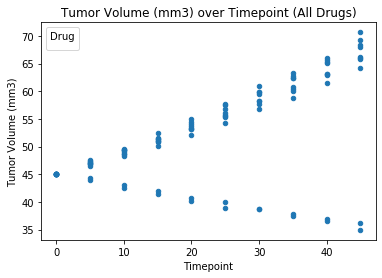

In [509]:
# Initial Scatter Plot of all the Means Data not grouped by Drug
df = means_df
ax = df.plot(kind="scatter",
       x="Timepoint", y="Tumor Volume (mm3)",
       title="Tumor Volume (mm3) over Timepoint (All Drugs)")

#create the legend
ax.legend(ax.get_lines(), df.columns, loc='best', title="Drug")

In [510]:
df.shape[1]
err_df.shape[1]
ax.get_lines()

<a list of 0 Line2D objects>

In [511]:
# # Generate the Plot (with Error Bars)

# df = meansPivot_df
# err_df = stdErrorPivot_df

# colnames = list(df.columns)

# #df.plot(figsize=(12,8), style=['^-', 'o--', 'x-.', 'D-'], markersize=14, ax = ax)

# #plot the means data with error bars (yerr= err_df)
# # df.index is the x-axis of this plot no need to reset_index()
# ax = df.plot(y=colnames, yerr = err_df,
#         kind = 'line', legend=False, 
#         subplots = False, sharex = True, figsize = (8,8), 
#         ls="-", marker="o",
#         title='Tumor Volume over Time for each Drug', grid=True)

# # clean up labels
# plt.xlabel("Time (Days)")
# plt.ylabel("Tumor Volume (mm3)")

# # set the line markers
# # from: https://stackoverflow.com/questions/39246115/pandas-dataframe-line-plot-show-random-markers
# # use fillable markers.  randomly chose a list of valid markers
# valid_markers = mpl.markers.MarkerStyle.filled_markers
# markers = np.random.choice(valid_markers, df.shape[1], replace=False)

# print(f"Markers = {markers}")
# for i, line in enumerate(ax.get_lines()):
#     #print(f"i = {i}")
#     line.set_marker(markers[i])

# #create the legend
# ax.legend(ax.get_lines(), df.columns, loc='best', title="Drug")

# # asthetics for plot area of graph
# plt.xlim(-1, max(df.index) * 1.1)
# plt.ylim(min(df.min() * 0.9), max(df.max()) * 1.1)

# #plot the graph
# plt.tight_layout()
# plt.show()


In [512]:
# Generate the Plot (with Error Bars)
# set the plotting dfs
df = meansPivot_df
err_df = stdErrorPivot_df
colnames = list(df.columns)

In [513]:
# from: https://stackoverflow.com/questions/39246115/pandas-dataframe-line-plot-show-random-markers
# use fillable markers.  randomly chose a list of valid markers
valid_markers = mpl.markers.MarkerStyle.filled_markers
markers = np.random.choice(valid_markers, df.shape[1], replace=False)

linestyles = [f"{marker}--" for marker in markers]

print(f"Markers = {markers}")
print(f"linestyles = {linestyles}")

styles = dict(zip(colnames, linestyles))
print(f"styles = {styles}")

Markers = ['d' 'H' 'P' 's' 'v' 'h' 'X' '8' '*' '<']
linestyles = ['d--', 'H--', 'P--', 's--', 'v--', 'h--', 'X--', '8--', '*--', '<--']
styles = {'Capomulin': 'd--', 'Ceftamin': 'H--', 'Infubinol': 'P--', 'Ketapril': 's--', 'Naftisol': 'v--', 'Placebo': 'h--', 'Propriva': 'X--', 'Ramicane': '8--', 'Stelasyn': '*--', 'Zoniferol': '<--'}


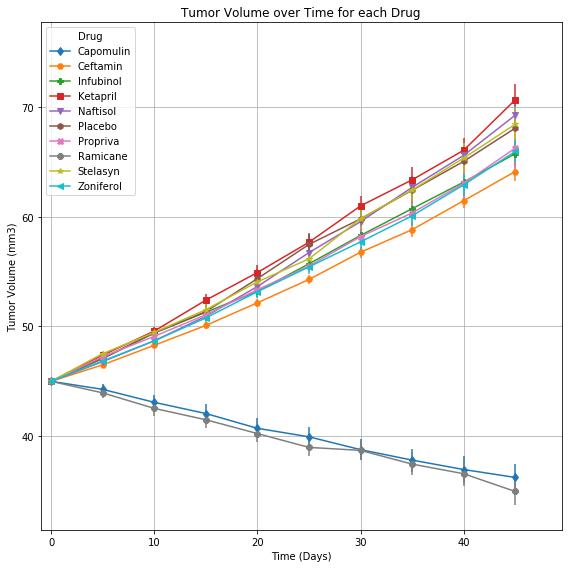

In [514]:

#plot the means data with error bars (yerr= err_df)
# df.index is the x-axis of this plot no need to reset_index()
ax = df.plot(y=colnames, yerr = err_df,
        kind= 'line', legend=True, 
        subplots = False, sharex = True, figsize = (8,8), #ls="-", 
        #style= styles, #marker= markers),
        title='Tumor Volume over Time for each Drug', grid=True)

# clean up labels
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

# set the line markers because error bars have wiped them out
for i, line in enumerate(ax.get_lines()):
    # print(f"i = {i}")
    #line.style(linestyles[i])
    line.set_marker(markers[i])

# re-create the legend with the markers
ax.legend(ax.get_lines(), df.columns, loc='best', title="Drug")

# asthetics for plot area of graph
plt.xlim(-1, max(df.index) * 1.1)
plt.ylim(min(df.min() * 0.9), max(df.max()) * 1.1)

# plot the graph & save the Figure
plt.tight_layout()
plt.savefig("./results/TumorVolume_vs_Time.png", format='png', dpi=100)
plt.show()

In [515]:
# # Show the Figure
# plt.tight_layout()
# fig1 = plt.gcf()
# plt.show()
# plt.draw()

# # Save the Figure
# plt.savefig("./results/TumorVolume_vs_Time.png", format='png', dpi=300)
# fig1.savefig("./results/TumorVolume_vs_Time2.png", format='png', dpi=100)


# Tumor Volume vs Time Analysis
* The Capomulin and Ramicane appear to be effective at reducing tumor volume for this form of cancer in mice. 
* All other drug treatments do not have noticible effect on reducing tumor volume

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [519]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metGroupByDrugTimepoint = combined_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites']

# Convert to DataFrame
metMeans_df = pd.DataFrame(metGroupByDrugTimepoint.mean())
#metMeans_df = metMeans_df.reset_index()

# Preview DataFrame
metMeans_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [524]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metStdErr_df = pd.DataFrame(metGroupByDrugTimepoint.sem())

# Convert to DataFrame
#metStdErr_df = metStdErr_df.reset_index()
# Preview DataFrame
metStdErr_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [525]:
# Minor Data Munging to Re-Format the Data Frames
metMeansPivot_df = pd.pivot_table(metMeans_df, index="Timepoint", columns="Drug")
metMeansPivot_df = metMeansPivot_df['Metastatic Sites']
# Preview that Reformatting worked
metMeansPivot_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [526]:
# Minor Data Munging to Re-Format the Data Frames
metStdErrPivot_df = pd.pivot_table(metStdErr_df, index="Timepoint", columns="Drug")
metStdErrPivot_df = metStdErrPivot_df['Metastatic Sites']
# Preview that Reformatting worked
metStdErrPivot_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [528]:
# Generate the Plot (with Error Bars)
# set the plotting dfs
df = metMeansPivot_df
err_df = metStdErrPivot_df
colnames = list(df.columns)

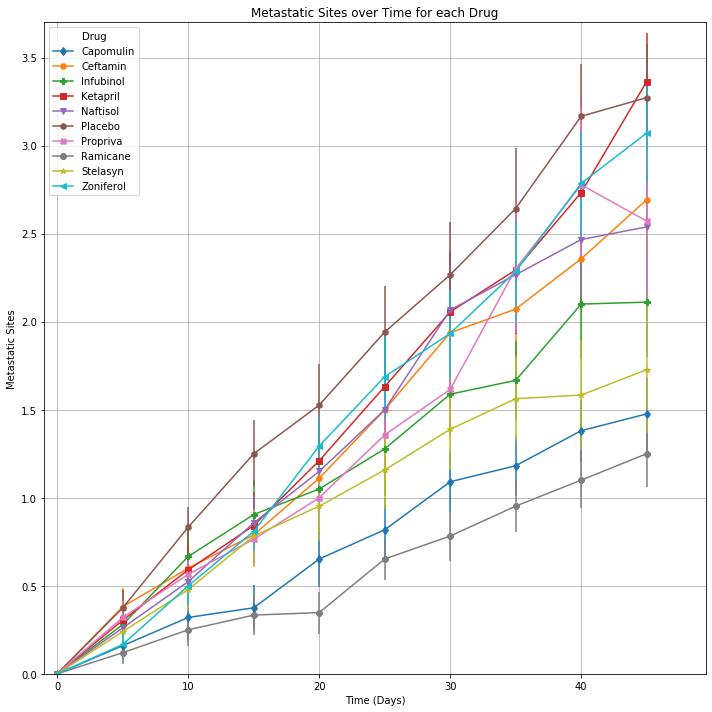

In [534]:
# Generate the Plot (with Error Bars)plot the means data with error bars (yerr= err_df)
# df.index is the x-axis of this plot no need to reset_index()
ax = df.plot(y=colnames, yerr = err_df,
        kind= 'line', legend=True, 
        subplots = False, sharex = True, figsize = (10,10), #ls="-", 
        #style= styles, #marker= markers),
        title='Metastatic Sites over Time for each Drug', grid=True)

# clean up labels
plt.xlabel("Time (Days)")
plt.ylabel("Metastatic Sites")

# set the line markers because error bars have wiped them out
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])

# re-create the legend with the markers
ax.legend(ax.get_lines(), df.columns, loc='best', title="Drug")

# asthetics for plot area of graph
plt.xlim(-1, max(df.index) * 1.1)
plt.ylim(min(df.min() * 0.9), max(df.max()) * 1.1)

# Save the Figure
plt.tight_layout()
plt.savefig("./results/MetastaticSites_vs_Time.png", format='png', dpi=100)

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)